# Santos, Santos, Pacheco Results #
The results achieved in the simulations by SSP (Santos Santos Pachecho) in their paper *Social Norms of Cooperation in Small-Scale Societies* can be seen in the following graph.


<img src="http://journals.plos.org/ploscompbiol/article/figure/image?size=large&id=info:doi/10.1371/journal.pcbi.1004709.g001"/>

One can see an almost constant cooperation index for population sizes greater than 50 for Stern Judging, Shunning, and Image Score. While Simple Standing increases steadily over the range 50-300.

Below we will be performing the same simulation and plotting the results in order to verify and compare the simulations results and those of the paper.

First however let us define the social norms we will use as well as a function to pass varying population sizes and social norms for retrieving the results.

In [3]:
%pylab inline
%load_ext autoreload
%autoreload 2

import SimulationInstance
import SimulationMain
import SimulationInstanceVectorized

SternJudging = [[1, 0 ],
                [0, 1]]
SimpleStanding = [[1, 1],
                  [0, 1]]
Shunning = [[1, 0],
            [0, 1]]
ImageScore = [[1, 1],
              [0, 0]]

def SSP(population_size, socialnorm):
    runs = 2
    generations = 3*np.power(10, 5)
    mutation_rate = np.power(10*population_size, -1)

    execution_error = 0.08
    reputation_assignment_error = 0.01
    private_assessment_error = 0.01
    reputation_update_probability = 0.2
    randomseed = np.random.randint(999999)
    cost = 1
    benefit = 5
    coop_index = SimulationInstanceVectorized.run_instance(runs, generations, population_size,
        mutation_rate, execution_error, reputation_assignment_error, private_assessment_error,
        reputation_update_probability, randomseed, socialnorm,
        cost, benefit)
    return coop_index

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Now let us retrieve the results for populations in the ranges 10-150, with simulations at every multiple of 10, and then simulations at multiples of 25 from 150-300. 

Let's begin with the social norm of Stern Judging.

In [5]:
population_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150,
                    175, 200, 225, 250, 275, 300]

In [4]:
stern_judging_results = [[SSP(size, SternJudging), size] for size in population_sizes]

Cooperation index: 0.9013833333333333
Cooperation index: 0.5709979166666667
Cooperation index: 0.8582768518518519
Cooperation index: 0.8282350694444445
Cooperation index: 0.7999027777777777
Cooperation index: 0.548167824074074
Cooperation index: 0.7787900793650794
Cooperation index: 0.7666298611111111
Cooperation index: 0.22827808641975308
Cooperation index: 0.23062069444444444
Cooperation index: 0.3190335858585859
Cooperation index: 0.29855358796296294
Cooperation index: 0.1681474358974359
Cooperation index: 0.3456808531746032
Cooperation index: 0.2904833333333333
Cooperation index: 0.1608411111111111
Cooperation index: 0.21155458333333332
Cooperation index: 0.23972327160493828
Cooperation index: 0.26114794444444445
Cooperation index: 0.32895979797979796
Cooperation index: 0.29224925925925926


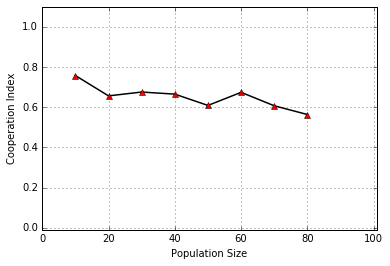

In [41]:
#stern_judging_results = np.array(stern_judging_results)
### Results from computation on a larger machine:
results_temp_x = np.array([0.7572617171474361, 0.6559912542067308, 0.6751163058226496, 
                 0.6647177919671474, 0.6084611420673078, 0.6736594268162392,
                 0.606742612408425, 0.5633312441406251])
# results_temp_x2
results_temp_y = np.array([10, 20, 30, 40, 50, 60, 70, 80])
#x = stern_judging_results[:,0]
#y = stern_judging_results[:,1]
plt.plot(results_temp_y, results_temp_x, 'k', results_temp_y, results_temp_x, 'r^', linewidth=1.5)
plt.ylim((-0.01, 1.1))
plt.xlim((-0.01, 101))
plt.ylabel('Cooperation Index')
plt.xlabel('Population Size')
plt.grid(True)
plt.show()

In [23]:
results = [[[SimulationMain.ssp_parallel(8, p_size, SternJudging) for p_size in population_sizes], population_sizes],
          [[SimulationMain.ssp_parallel(8, p_size, SimpleStanding) for p_size in population_sizes], population_sizes],
          [[SimulationMain.ssp_parallel(8, p_size, Shunning) for p_size in population_sizes], population_sizes],
          [[SimulationMain.ssp_parallel(8, p_size, ImageScore) for p_size in population_sizes], population_sizes]]

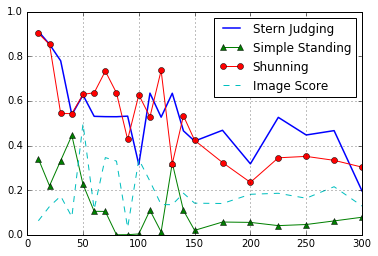

In [42]:
line_sj, = plt.plot(np.array(results)[0][1], np.array(results)[0][0], linewidth=1.5, label='Stern Judging')
line_ss, = plt.plot(np.array(results)[1][1], np.array(results)[1][0], label='Simple Standing', marker='^')
line_sh, = plt.plot(np.array(results)[2][1], np.array(results)[2][0], label='Shunning', marker='o')
line_is, = plt.plot(np.array(results)[3][1], np.array(results)[3][0], label='Image Score', linestyle='--')
plt.legend(handles=[line_sj, line_ss, line_sh, line_is])
plt.grid(True)
plt.show()